# Insurance Claim Dataset

This notbook will try to tackle the dataset from this kaggle challange: https://www.kaggle.com/awaiskaggler/insurance-csv



## Libraries

In [19]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

## Data Loading and Specifications

In [3]:
data = pd.read_csv('../input/insurance.csv')
data.shape

(1338, 7)


In [4]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

## Columns Visualization

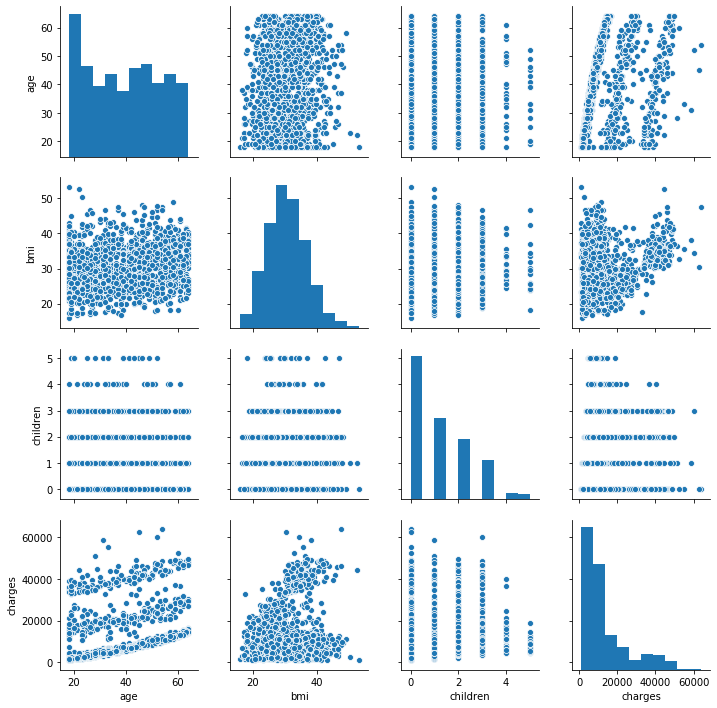

In [7]:
sns.pairplot(data)

Text(0.5, 1.0, 'Age')

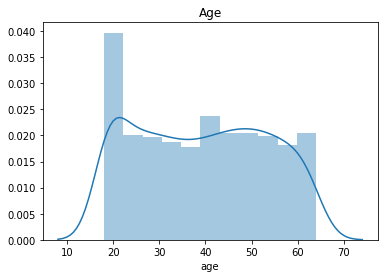

In [8]:
sns.distplot(data['age'])
plt.title('Age')

Text(0.5, 1.0, 'Smoker')

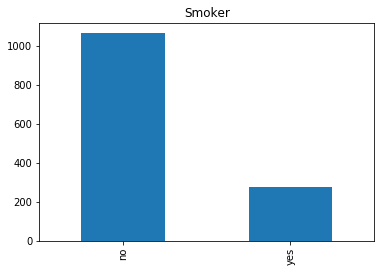

In [16]:
data['smoker'].value_counts().plot.bar()
plt.title('Smoker')

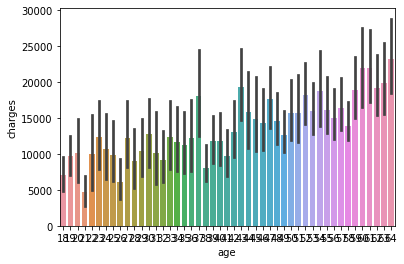

In [17]:
sns.barplot(x = 'age', y = 'charges', data = data)

Text(0.5, 1, 'Correlation Matrix')

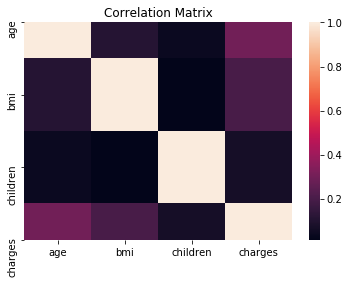

In [18]:
sns.heatmap(data.corr())
plt.title('Correlation Matrix')

## Data Processing

In [38]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])         # 0 female  1 male
data['smoker'] = le.fit_transform(data['smoker'])   # 0 no      1 yes
data['region'] = le.fit_transform(data['region'])
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [39]:
X = data.iloc[:, :5]
y = data.iloc[:, 5]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2142)

In [41]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 5) (268, 5) (1070,) (268,)


Scaling (Normalizing) the Data

In [42]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [43]:
X_train

array([[ 0.22597761,  1.01506676,  0.89518895,  0.7773515 , -0.51601569],
       [ 0.08217979,  1.01506676, -0.10790318,  0.7773515 , -0.51601569],
       [ 0.80116891, -0.98515688, -0.48798751, -0.06451703,  1.93792558],
       ...,
       [-1.21200065,  1.01506676,  3.64005885, -0.06451703,  1.93792558],
       [-1.42769738, -0.98515688, -0.37065713, -0.90638556,  1.93792558],
       [ 0.58547218, -0.98515688, -0.73173724, -0.06451703,  1.93792558]])

### Dimensionality Reduction
PCA maintains all the features which are important to the target as a whole.

In [44]:
pca = PCA(n_components = None)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [45]:
X_train

array([[-0.52993414,  0.88273583,  0.49245163, -1.19134716,  0.17739174],
       [ 0.16443453,  0.53089758,  0.84580203, -0.90250778, -0.283747  ],
       [-0.29520829,  0.45245366, -0.19001781,  2.27571432, -0.32157556],
       ...,
       [-0.64798635,  2.96035165, -2.05724947, -0.49730076,  2.41782979],
       [ 1.33724852,  0.05650066, -1.30866749,  1.85648696,  0.87906232],
       [ 0.00595697,  0.35215325, -0.13081914,  2.31648281, -0.31814384]])

## Usages of Regressor
This model, Random Forest, is a deciding model which is used as a regressor which will can extrapolate or interpolate datapoints which which were previously unkown.

In [49]:
rf = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [50]:
mse = np.mean((y_test - y_pred)**2, axis = None)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [51]:
print("MSE :", mse)
print("RMSE :", rmse)
print("r2 score :", r2)

MSE : 1.2304416331779242
RMSE : 1.1092527363851414
r2 score : -0.024438543839141458
